# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set()

from scipy import stats  
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head(3)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/macbook/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


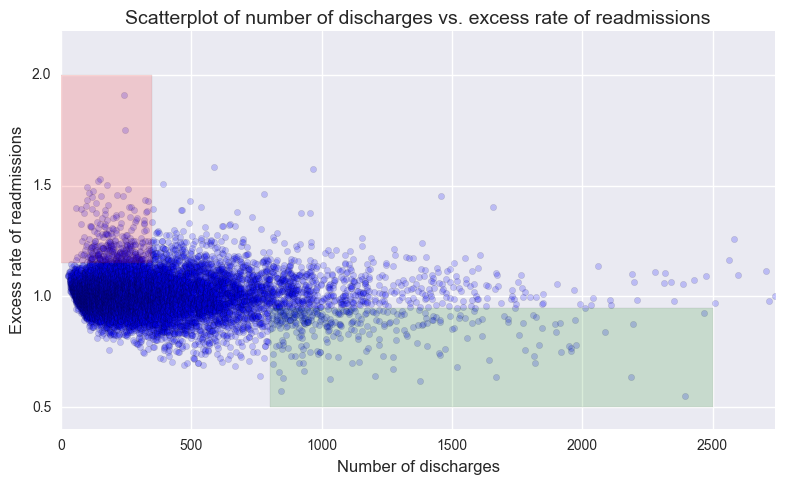

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

****

## Do you agree with the above analysis and recommendations? Why or why not?

I don't agree with the above analysis and recommendation. Firstly, it does not handle missing data within the dataset such that the missing values for Excess Readmission Ratio where Number of Discharges are present vice versa. Also, the analysis above states that perhaps smaller hospitals have less resources and therefore a higher excess readmission ratio, but the data does not have hospital capacity data and cannot be inferred directly. 

## Is there an association between the number of discharges and the excess readmission ratio


$H_{o}$ : There is no linear association between the Number of Discharges and the Excess Readmission Ratio

$H_{A}$ : There is a linear asscoation between the Number of Discharges and the Excess Readmission Ratio. 

<br>

Checking if the Linear Regression Model can be used:
1. Linearity in Data
2. Residuals must follow a Normal Distribution, if not it can be approximated
3. Constant Standard Deviation for the predictor variable (Number of Discharges)
4. Errors are independent

<br>


correlation coefficient r= -0.097

p-value = 1.2e-25

A relationship between the Number of Discharges and Excess Readmission Ratio exists if $|r| \geq \frac{2}{\sqrt{n}} $. In our case ,there exist a weak negative correlation between these two variables because 0.097 $\geq$ 0.018. It is expected that as the number of discharges increases, the excess readmission ratio decreases. With the p-value being less than $\alpha$ = .01, the correlation coefficient r is statistically significant. Although in terms of practical significance, with an $r^2$ = 0.009, 9% of the variation in the excess readmission ratio can be explained by the number of hospital discharges. This practical significance can also be explained by the slope such that as the number of discharges increases by 1 unit, the prediction for the excess readmission ratio changes by -2.90105173e-05. This prediction in the excess readmission ratio by the number of discharges at 95% CI can change as low as -3.44e-05 to as high as -2.36e-05. It is difficult to predict the excess readmission ratio with the number of discharges because when a patient a discharged at Hospital A and within 30 days is readmitted to either back at Hospital A or to another hospital. It is more accurate to predict the excess readmission ratio with the number of readmissions instead. Patients are accounted for and the number of discharges in the equation for the excess readmission ratio is not relevant. 

In [5]:
df = hospital_read_df
df.isnull().any()

Hospital Name                 False
Provider Number               False
State                         False
Measure Name                  False
Number of Discharges          False
Footnote                       True
Excess Readmission Ratio       True
Predicted Readmission Rate     True
Expected Readmission Rate      True
Number of Readmissions         True
Start Date                    False
End Date                      False
dtype: bool

In [7]:
df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [7]:
df.isnull().any()

Hospital Name                 False
Provider Number               False
State                         False
Measure Name                  False
Number of Discharges          False
Footnote                       True
Excess Readmission Ratio       True
Predicted Readmission Rate     True
Expected Readmission Rate      True
Number of Readmissions         True
Start Date                    False
End Date                      False
dtype: bool

In [10]:
df.loc[:, df.isnull().any()].head()

,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
0,NaN,1.9095,10.8,5.6,38.0
1,NaN,1.7521,9.2,5.3,33.0
2,NaN,1.5836,7.6,4.8,53.0
3,NaN,1.5760,9.0,5.7,95.0
4,NaN,1.5308,8.2,5.4,20.0


In [8]:
#Discharges had not available as NaN value. Changed it NaN
df['Number of Discharges'] = df['Number of Discharges'].replace('Not Available', np.NaN)
df['Number of Discharges'] = df['Number of Discharges'][(df['Number of Discharges'].isnull() !=True)].astype(float)

In [9]:
df.loc[:,df.isnull().any()].head()

,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
0,242.0,NaN,1.9095,10.8,5.6,38.0
1,247.0,NaN,1.7521,9.2,5.3,33.0
2,586.0,NaN,1.5836,7.6,4.8,53.0
3,965.0,NaN,1.5760,9.0,5.7,95.0
4,149.0,NaN,1.5308,8.2,5.4,20.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          11578 non-null float64
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


## Correlation Heat Map

The scatter plot above is too cluttered and only accounts and the data only accounts for a small slice of the list of the data. It should instead draw random samples and plot it. A heat map is better suited for quantifying the correlation between the predictor variables and the excess readmission ratio. 

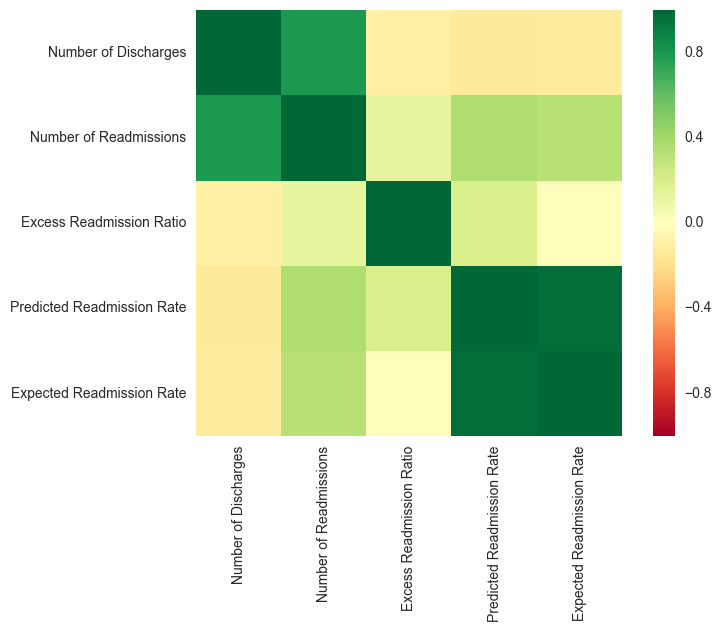

In [14]:
df3 = df[['Number of Discharges','Number of Readmissions','Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate']]

sns.heatmap(df3.corr(), square=True, cmap='RdYlGn')


## Checking for Linearity
To check for linearity in the data, a scatter plot will be used with the Number of Discharges as the x-variable, predictor variable, and the Excess Readmission Ratio as the y-variable, the response variable. Upon checking the scatter plot, the data does not seem conclusive that there is a linear trend. In order to further examine linearity, a residual plot was used where on the x-axis is the Number of Discharges, and the y-axis is the residuals of from the regression line. If the residual plot shows no trend, then the data is linearly associated. 

In [11]:
# only want number of discharges and readmission ratio

df1 = df[['Number of Discharges','Excess Readmission Ratio']]
df1.columns = ['NoD', 'ERR']
df1 = df1.dropna()

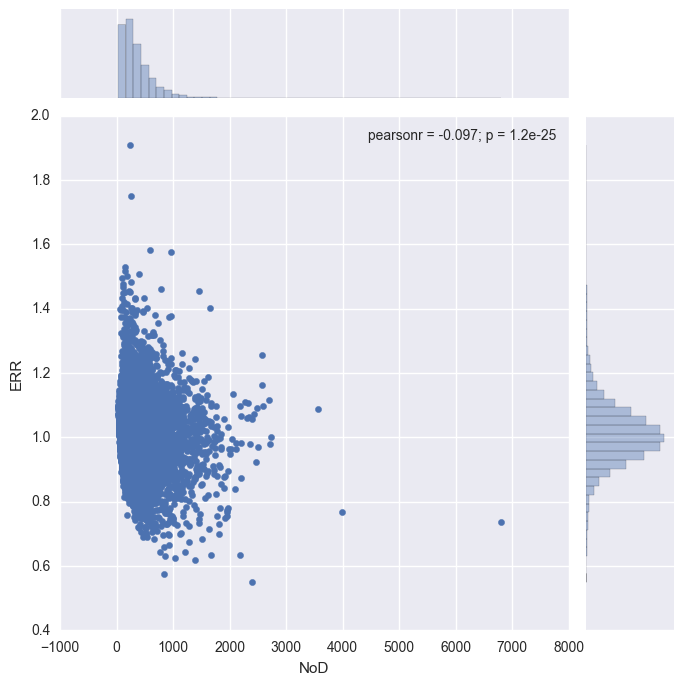

In [12]:
sns.jointplot(x='NoD', y='ERR', data=df1, size=7)


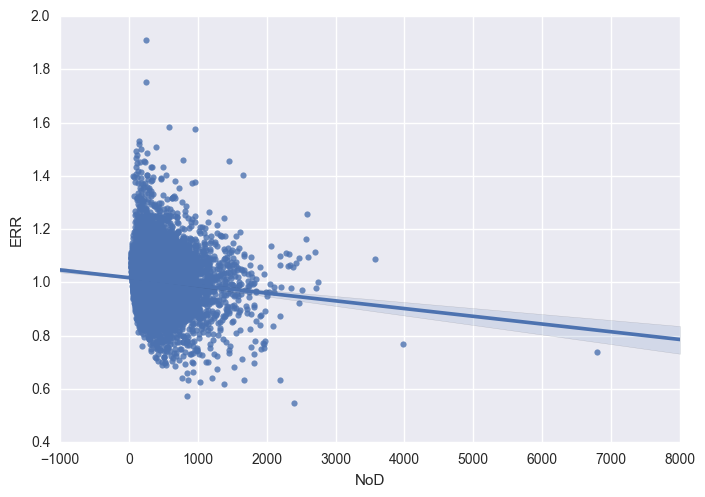

In [13]:
sns.regplot(x=df1.NoD, y=df1.ERR, data=df1)

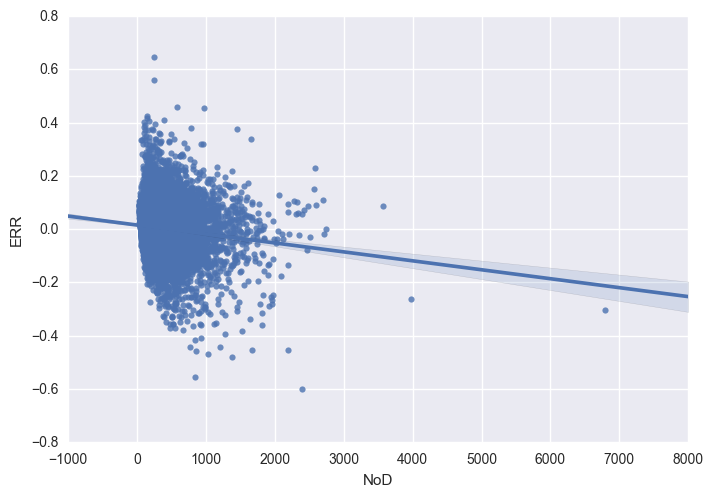

In [14]:
logx = np.log(df1.NoD)
logy = np.log(df1.ERR)

sns.regplot(df1.NoD, logy)


In [15]:
#cacluating the slope and intercept of the regression line

fit = np.polyfit(df1.NoD, df1.ERR, 1)
fit

array([-2.90105173e-05,  1.01810615e+00])

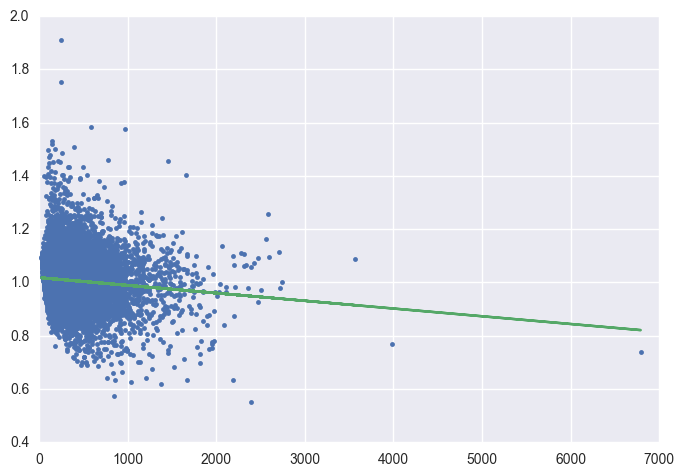

In [20]:
fit_fn = np.poly1d(fit) # y = mx +b, automatically takes polynomial coefficients and constructs a function 

plt.plot(df1.NoD, df1.ERR, '.', df1.NoD, fit_fn(df1.NoD), '-')

#plt.plot(df1.NoD, df1.ERR, '.')
#plt.plot(x_theor, y_theor)

In [18]:
y_hat = fit[1] + (fit[0]) * df1.NoD

residuals = (df1.ERR - y_hat) ** 2

(0, 3000)

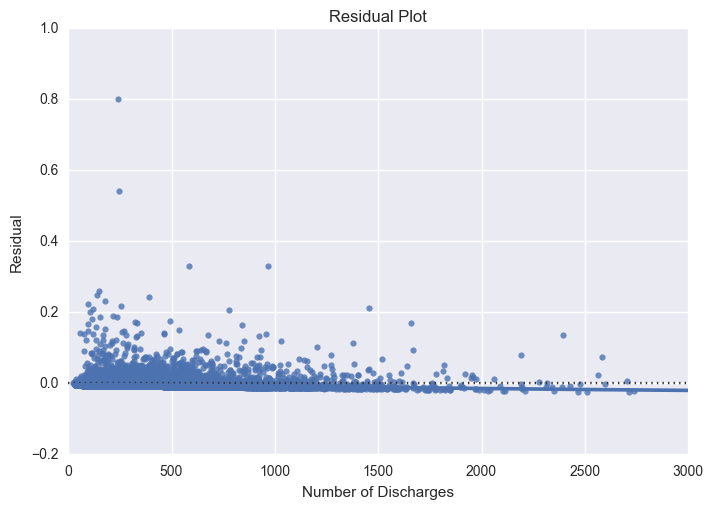

In [20]:
#the residual plot shows a decreasing trend in variance error
sns.residplot(x=df1.NoD, y=residuals, lowess=True)
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Number of Discharges')
plt.xlim([0,3000])


## Checking if the Residuals (Errors) are Normally Distributed

By using a QQ plot and a Histogram, normality in the errors can be determined. 

The following plots show that the residuals do not follow a Normal Distribution entirely, however the fit is close enough where it can be approximated. 

Because there are few outliers in the data, that skews the distribution of the residuals. 

((array([-3.84495379, -3.62169793, -3.49921585, ...,  3.49921585,
          3.62169793,  3.84495379]),
  array([5.74397789e-10, 2.64345848e-09, 2.78070402e-09, ...,
         3.43265922e-01, 5.49317331e-01, 8.07148430e-01])),
 (0.01208710596360485, 0.00837646740028495, 0.61332124391574))

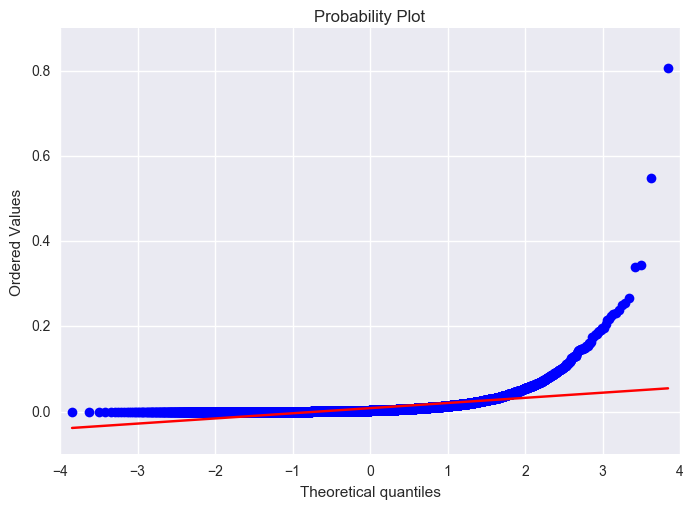

In [22]:
stats.probplot(residuals, plot=plt)

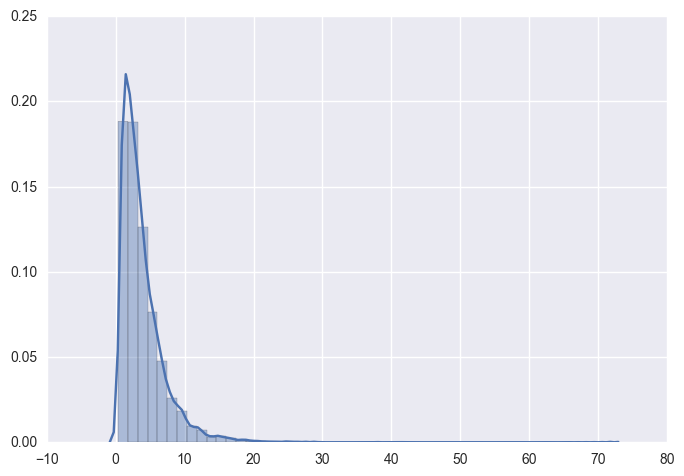

In [42]:
sns.distplot(residuals, norm_hist=True)

In [23]:
mod = smf.ols(formula='ERR ~ NoD', data=df1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ERR   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     110.1
Date:                Wed, 01 Aug 2018   Prob (F-statistic):           1.22e-25
Time:                        16:27:24   Log-Likelihood:                 11178.
No. Observations:               11497   AIC:                        -2.235e+04
Df Residuals:                   11495   BIC:                        -2.234e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0181      0.001    769.664      0.0

In [24]:
r, p = stats.pearsonr(df1.NoD, df1.ERR)


In [25]:
r

-0.09739794351079355

In [26]:
#least square line using the point slope formula 

In [27]:
sy = np.std(df1.ERR)
sx = np.std(df1.NoD)

b1 = (sy/sx) * r
b1

-2.901051733057068e-05

In [28]:
bo = np.mean(df1.ERR) - b1 * np.mean(df1.NoD)
bo

1.0181061473733535

In [29]:
slope = b1 * (-np.mean(df1.NoD)) 
slope

0.010602363777636367

## Using Number of Readmissions to predict the Excess Readmission Ratio

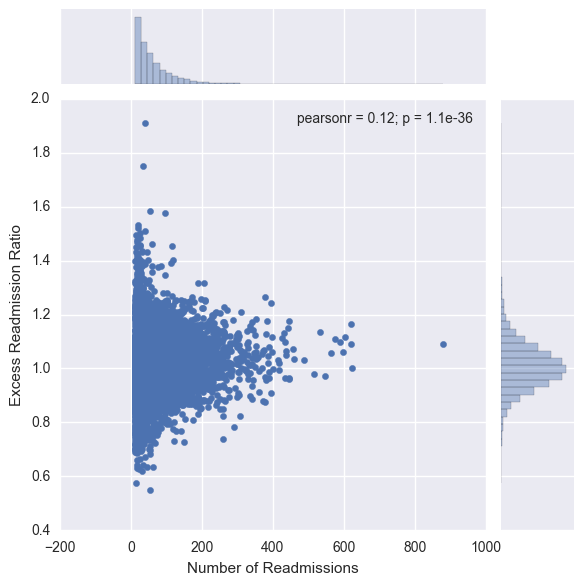

In [30]:
sns.jointplot(x='Number of Readmissions', y='Excess Readmission Ratio', data=df)

In [31]:
df2 = df[['Number of Readmissions','Excess Readmission Ratio']]
df2.columns = ['NoR','ERR']
df2 = df2.dropna()

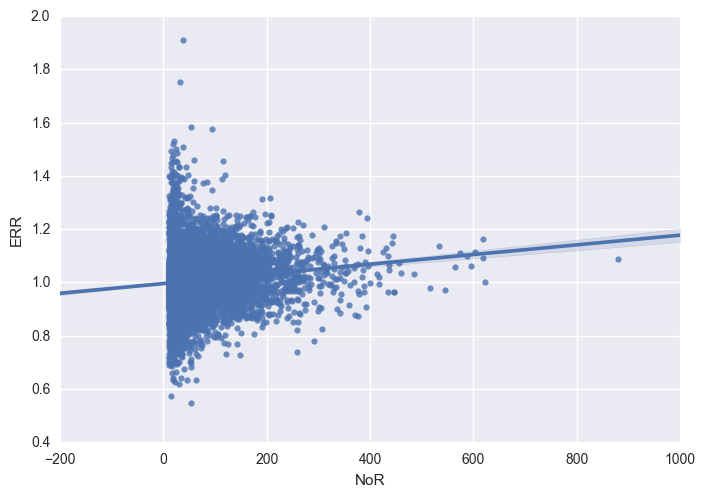

In [32]:
sns.regplot(df2.NoR, df2.ERR, data=df2)

In [33]:
df2 = df[['Number of Readmissions','Excess Readmission Ratio']]
df2.columns = ['NoR','ERR']
df2 = df2.dropna()


In [34]:
stats.pearsonr(df2.NoR, df2.ERR)

(0.11759983412898264, 1.0894754069537121e-36)

In [35]:
mod = smf.ols(formula ='ERR ~ NoR', data=df2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ERR   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     161.2
Date:                Wed, 01 Aug 2018   Prob (F-statistic):           1.09e-36
Time:                        16:28:03   Log-Likelihood:                 11203.
No. Observations:               11497   AIC:                        -2.240e+04
Df Residuals:                   11495   BIC:                        -2.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9959      0.001    798.860      0.0